# Data Loading, Cleaning and Exploration

In [1]:
# import dependencies and libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data
LIID_data=pd.read_excel(r"C:\Users\HP\Documents\brooks interview\Case Study C_LIID pre-LSE sessions self efficacy AIM and IAM.xlsx")

In [3]:
LIID_data

,start,end,Do you consent to be interviewed,Camp Name,Part 1. Life Skills Education Self-Efficacy Assessment for Internally Displaced Nigerians,Respondent's ID,"1.1. I can find meaning in my life, even when things are hard.",1.2. I can set goals that are important to me.,1.3. I can use my beliefs to help me when I face problems.,2.1. I can handle stress when life is difficult.,...,The Life Skills Education (LSE) intervention is appealing to me.,I like the Life Skills Education (LSE) intervention.,I welcome the Life Skills Education (LSE) intervention,The Life Skills Education (LSE) intervention seems fitting for internally displaced persons.,The Life Skills Education (LSE) intervention seems suitable for our community,The Life Skills Education (LSE) intervention seems applicable to our mental health needs,The Life Skills Education (LSE) intervention seems like a good match for our situation.,_id,_submission_time,_index
0,2024-11-15 10:26:44.834,2024-11-16 04:43:12.457,Yes,Duur IDP camp,NaN,LIID_DUUR001,Very sure,Very sure,Very sure,Quite sure,...,Completely agree,Completely agree,Completely agree,Agree,Agree,Agree,Agree,408966399,2024-11-16 03:53:37,158
1,2024-11-14 10:41:11.997,2024-11-14 10:56:53.154,Yes,Duur IDP camp,NaN,LIID_DUUR002,Very sure,A little sure,Quite sure,Not sure at all,...,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,408245552,2024-11-14 14:38:19,7
2,2024-11-14 10:42:23.147,2024-11-14 13:47:43.218,Yes,Duur IDP camp,NaN,LIID_DUUR003,Very sure,Very sure,Very sure,Quite sure,...,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,408559203,2024-11-15 07:34:46,102
3,2024-11-14 12:29:52.286,2024-11-15 06:30:01.436,Yes,Duur IDP camp,NaN,LIID_DUUR004,Very sure,Very sure,Very sure,A little sure,...,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,408525929,2024-11-15 05:30:39,97
4,2024-11-14 12:03:09.936,2024-11-14 12:17:57.888,Yes,Duur IDP camp,NaN,LIID_DUUR005,Quite sure,Somewhat sure,Somewhat sure,Quite sure,...,Completely agree,Agree,Agree,Agree,Agree,Agree,Agree,408510629,2024-11-15 03:48:41,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2024-11-15 12:54:15.523,2024-11-15 16:36:29.626,Yes,Sawa IDP Camp,NaN,LIID_SAWA121,Very sure,Very sure,Very sure,Quite sure,...,Agree,Agree,Agree,Agree,Agree,Agree,Completely agree,408776707,2024-11-15 15:37:14,125
220,2024-11-21 14:44:20.566,2024-11-23 12:19:49.128,Yes,Sawa IDP Camp,NaN,LIID_SAWA122,Very sure,Very sure,Very sure,Very sure,...,Agree,Agree,Agree,Agree,Completely agree,Completely agree,Completely agree,412046418,1900-01-11 00:00:00,215
221,2024-11-19 15:37:38.914,2024-11-23 12:18:42.805,Yes,Sawa IDP Camp,NaN,LIID_SAWA123,Quite sure,Very sure,Very sure,Very sure,...,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,412046370,1900-01-11 00:00:00,210
222,2024-11-14 13:48:47.298,2024-11-14 15:53:34.257,Yes,Sawa IDP Camp,NaN,LIID_SAWA124,Very sure,Very sure,Very sure,Very sure,...,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,408256299,2024-11-14 14:54:57,17


In [4]:
LIID_data.columns

Index(['start', 'end', 'Do you consent to be interviewed', 'Camp Name',
       'Part 1. Life Skills Education Self-Efficacy Assessment for Internally Displaced Nigerians',
       'Respondent's ID',
       '1.1. I can find meaning in my life, even when things are hard.  ',
       '1.2. I can set goals that are important to me. ',
       '1.3. I can use my beliefs to help me when I face problems. ',
       '2.1. I can handle stress when life is difficult. ',
       '2.2. I can break big problems into smaller, easier parts. ',
       '2.3. I can recognize when I'm feeling bad and do something about it. ',
       '3.1. I can recover when things go wrong. ',
       '3.2. I can use my strengths to overcome challenges. ',
       '3.3. I can stay hopeful even when problems last a long time. ',
       '4.1. I can be proud of both my tribe and being Nigerian. ',
       '4.2. I can help different tribes understand each other better. ',
       '4.3. I can explain to others why Nigeria’s different 

In [5]:
# Data Inspection for information on the dataset
LIID_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 53 columns):
 #   Column                                                                                                     Non-Null Count  Dtype         
---  ------                                                                                                     --------------  -----         
 0   start                                                                                                      224 non-null    datetime64[ns]
 1   end                                                                                                        224 non-null    datetime64[ns]
 2   Do you consent to be interviewed                                                                           224 non-null    object        
 3   Camp Name                                                                                                  224 non-null    object        
 4   Part 1. Life Skills Education Se

In [6]:
# Check for data types
LIID_data.dtypes

start                                                                                                        datetime64[ns]
end                                                                                                          datetime64[ns]
Do you consent to be interviewed                                                                                     object
Camp Name                                                                                                            object
Part 1. Life Skills Education Self-Efficacy Assessment for Internally Displaced Nigerians                           float64
Respondent's ID                                                                                                      object
1.1. I can find meaning in my life, even when things are hard.                                                       object
1.2. I can set goals that are important to me.                                                                       object
1.3. I c

In [7]:
# Rename columns by removing numeric prefixes
LIID_data.columns = LIID_data.columns.str.replace(r"^\d+\.\d+\.\s*", "", regex=True)
LIID_data.head()

,start,end,Do you consent to be interviewed,Camp Name,Part 1. Life Skills Education Self-Efficacy Assessment for Internally Displaced Nigerians,Respondent's ID,"I can find meaning in my life, even when things are hard.",I can set goals that are important to me.,I can use my beliefs to help me when I face problems.,I can handle stress when life is difficult.,...,The Life Skills Education (LSE) intervention is appealing to me.,I like the Life Skills Education (LSE) intervention.,I welcome the Life Skills Education (LSE) intervention,The Life Skills Education (LSE) intervention seems fitting for internally displaced persons.,The Life Skills Education (LSE) intervention seems suitable for our community,The Life Skills Education (LSE) intervention seems applicable to our mental health needs,The Life Skills Education (LSE) intervention seems like a good match for our situation.,_id,_submission_time,_index
0,2024-11-15 10:26:44.834,2024-11-16 04:43:12.457,Yes,Duur IDP camp,NaN,LIID_DUUR001,Very sure,Very sure,Very sure,Quite sure,...,Completely agree,Completely agree,Completely agree,Agree,Agree,Agree,Agree,408966399,2024-11-16 03:53:37,158
1,2024-11-14 10:41:11.997,2024-11-14 10:56:53.154,Yes,Duur IDP camp,NaN,LIID_DUUR002,Very sure,A little sure,Quite sure,Not sure at all,...,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,408245552,2024-11-14 14:38:19,7
2,2024-11-14 10:42:23.147,2024-11-14 13:47:43.218,Yes,Duur IDP camp,NaN,LIID_DUUR003,Very sure,Very sure,Very sure,Quite sure,...,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,408559203,2024-11-15 07:34:46,102
3,2024-11-14 12:29:52.286,2024-11-15 06:30:01.436,Yes,Duur IDP camp,NaN,LIID_DUUR004,Very sure,Very sure,Very sure,A little sure,...,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,408525929,2024-11-15 05:30:39,97
4,2024-11-14 12:03:09.936,2024-11-14 12:17:57.888,Yes,Duur IDP camp,NaN,LIID_DUUR005,Quite sure,Somewhat sure,Somewhat sure,Quite sure,...,Completely agree,Agree,Agree,Agree,Agree,Agree,Agree,408510629,2024-11-15 03:48:41,71


In [8]:
# Removing apostrophes from column headers
LIID_data.columns = LIID_data.columns.str.replace("'", "")

In [9]:
# Removing DataFrame with column headers containing underscores
LIID_data.columns = LIID_data.columns.str.replace("_", "")
LIID_data.head()

,start,end,Do you consent to be interviewed,Camp Name,Part 1. Life Skills Education Self-Efficacy Assessment for Internally Displaced Nigerians,Respondents ID,"I can find meaning in my life, even when things are hard.",I can set goals that are important to me.,I can use my beliefs to help me when I face problems.,I can handle stress when life is difficult.,...,The Life Skills Education (LSE) intervention is appealing to me.,I like the Life Skills Education (LSE) intervention.,I welcome the Life Skills Education (LSE) intervention,The Life Skills Education (LSE) intervention seems fitting for internally displaced persons.,The Life Skills Education (LSE) intervention seems suitable for our community,The Life Skills Education (LSE) intervention seems applicable to our mental health needs,The Life Skills Education (LSE) intervention seems like a good match for our situation.,id,submissiontime,index
0,2024-11-15 10:26:44.834,2024-11-16 04:43:12.457,Yes,Duur IDP camp,NaN,LIID_DUUR001,Very sure,Very sure,Very sure,Quite sure,...,Completely agree,Completely agree,Completely agree,Agree,Agree,Agree,Agree,408966399,2024-11-16 03:53:37,158
1,2024-11-14 10:41:11.997,2024-11-14 10:56:53.154,Yes,Duur IDP camp,NaN,LIID_DUUR002,Very sure,A little sure,Quite sure,Not sure at all,...,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,408245552,2024-11-14 14:38:19,7
2,2024-11-14 10:42:23.147,2024-11-14 13:47:43.218,Yes,Duur IDP camp,NaN,LIID_DUUR003,Very sure,Very sure,Very sure,Quite sure,...,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,408559203,2024-11-15 07:34:46,102
3,2024-11-14 12:29:52.286,2024-11-15 06:30:01.436,Yes,Duur IDP camp,NaN,LIID_DUUR004,Very sure,Very sure,Very sure,A little sure,...,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,408525929,2024-11-15 05:30:39,97
4,2024-11-14 12:03:09.936,2024-11-14 12:17:57.888,Yes,Duur IDP camp,NaN,LIID_DUUR005,Quite sure,Somewhat sure,Somewhat sure,Quite sure,...,Completely agree,Agree,Agree,Agree,Agree,Agree,Agree,408510629,2024-11-15 03:48:41,71


In [10]:
# Remove spaces from column headers
LIID_data.columns = LIID_data.columns.str.replace(" ", "")
LIID_data.head()

,start,end,Doyouconsenttobeinterviewed,CampName,Part1.LifeSkillsEducationSelf-EfficacyAssessmentforInternallyDisplacedNigerians,RespondentsID,"Icanfindmeaninginmylife,evenwhenthingsarehard.",Icansetgoalsthatareimportanttome.,IcanusemybeliefstohelpmewhenIfaceproblems.,Icanhandlestresswhenlifeisdifficult.,...,TheLifeSkillsEducation(LSE)interventionisappealingtome.,IliketheLifeSkillsEducation(LSE)intervention.,IwelcometheLifeSkillsEducation(LSE)intervention,TheLifeSkillsEducation(LSE)interventionseemsfittingforinternallydisplacedpersons.,TheLifeSkillsEducation(LSE)interventionseemssuitableforourcommunity,TheLifeSkillsEducation(LSE)interventionseemsapplicabletoourmentalhealthneeds,TheLifeSkillsEducation(LSE)interventionseemslikeagoodmatchforoursituation.,id,submissiontime,index
0,2024-11-15 10:26:44.834,2024-11-16 04:43:12.457,Yes,Duur IDP camp,NaN,LIID_DUUR001,Very sure,Very sure,Very sure,Quite sure,...,Completely agree,Completely agree,Completely agree,Agree,Agree,Agree,Agree,408966399,2024-11-16 03:53:37,158
1,2024-11-14 10:41:11.997,2024-11-14 10:56:53.154,Yes,Duur IDP camp,NaN,LIID_DUUR002,Very sure,A little sure,Quite sure,Not sure at all,...,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,408245552,2024-11-14 14:38:19,7
2,2024-11-14 10:42:23.147,2024-11-14 13:47:43.218,Yes,Duur IDP camp,NaN,LIID_DUUR003,Very sure,Very sure,Very sure,Quite sure,...,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,408559203,2024-11-15 07:34:46,102
3,2024-11-14 12:29:52.286,2024-11-15 06:30:01.436,Yes,Duur IDP camp,NaN,LIID_DUUR004,Very sure,Very sure,Very sure,A little sure,...,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,408525929,2024-11-15 05:30:39,97
4,2024-11-14 12:03:09.936,2024-11-14 12:17:57.888,Yes,Duur IDP camp,NaN,LIID_DUUR005,Quite sure,Somewhat sure,Somewhat sure,Quite sure,...,Completely agree,Agree,Agree,Agree,Agree,Agree,Agree,408510629,2024-11-15 03:48:41,71


In [11]:
# Check for duplicate entries in the dataset
duplicates = LIID_data.duplicated().sum()

# Display the number of duplicate entries
print('Number of duplicate entries:', duplicates)

Number of duplicate entries: 0


In [12]:
#checking missing values
LIID_data.isnull().sum()

start                                                                                    0
end                                                                                      0
Doyouconsenttobeinterviewed                                                              0
CampName                                                                                 0
Part1.LifeSkillsEducationSelf-EfficacyAssessmentforInternallyDisplacedNigerians        224
RespondentsID                                                                            0
Icanfindmeaninginmylife,evenwhenthingsarehard.                                           0
Icansetgoalsthatareimportanttome.                                                        0
IcanusemybeliefstohelpmewhenIfaceproblems.                                               0
Icanhandlestresswhenlifeisdifficult.                                                     0
Icanbreakbigproblemsintosmaller,easierparts.                                             0

In [13]:
# Remove irrelevant columns since no entry in it
LIID_data.drop(columns='Part1.LifeSkillsEducationSelf-EfficacyAssessmentforInternallyDisplacedNigerians',axis=1,inplace=True)
LIID_data.head()

,start,end,Doyouconsenttobeinterviewed,CampName,RespondentsID,"Icanfindmeaninginmylife,evenwhenthingsarehard.",Icansetgoalsthatareimportanttome.,IcanusemybeliefstohelpmewhenIfaceproblems.,Icanhandlestresswhenlifeisdifficult.,"Icanbreakbigproblemsintosmaller,easierparts.",...,TheLifeSkillsEducation(LSE)interventionisappealingtome.,IliketheLifeSkillsEducation(LSE)intervention.,IwelcometheLifeSkillsEducation(LSE)intervention,TheLifeSkillsEducation(LSE)interventionseemsfittingforinternallydisplacedpersons.,TheLifeSkillsEducation(LSE)interventionseemssuitableforourcommunity,TheLifeSkillsEducation(LSE)interventionseemsapplicabletoourmentalhealthneeds,TheLifeSkillsEducation(LSE)interventionseemslikeagoodmatchforoursituation.,id,submissiontime,index
0,2024-11-15 10:26:44.834,2024-11-16 04:43:12.457,Yes,Duur IDP camp,LIID_DUUR001,Very sure,Very sure,Very sure,Quite sure,Quite sure,...,Completely agree,Completely agree,Completely agree,Agree,Agree,Agree,Agree,408966399,2024-11-16 03:53:37,158
1,2024-11-14 10:41:11.997,2024-11-14 10:56:53.154,Yes,Duur IDP camp,LIID_DUUR002,Very sure,A little sure,Quite sure,Not sure at all,Not sure at all,...,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,408245552,2024-11-14 14:38:19,7
2,2024-11-14 10:42:23.147,2024-11-14 13:47:43.218,Yes,Duur IDP camp,LIID_DUUR003,Very sure,Very sure,Very sure,Quite sure,Somewhat sure,...,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,408559203,2024-11-15 07:34:46,102
3,2024-11-14 12:29:52.286,2024-11-15 06:30:01.436,Yes,Duur IDP camp,LIID_DUUR004,Very sure,Very sure,Very sure,A little sure,A little sure,...,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,Completely agree,408525929,2024-11-15 05:30:39,97
4,2024-11-14 12:03:09.936,2024-11-14 12:17:57.888,Yes,Duur IDP camp,LIID_DUUR005,Quite sure,Somewhat sure,Somewhat sure,Quite sure,Somewhat sure,...,Completely agree,Agree,Agree,Agree,Agree,Agree,Agree,408510629,2024-11-15 03:48:41,71


In [14]:
# Removing extra whitespaces from data
def whitespace_remover(dataframe):

    # iterating over the columns
    for i in dataframe.columns:

        # checking datatype of each columns
        if dataframe[i].dtype == 'object':

            # applying strip function on column
            dataframe[i] = dataframe[i].map(str.strip)
        else:

            # if condn. is False then it will do nothing.
            pass


# applying whitespace_remover function on dataframe
whitespace_remover(LIID_data)

# printing dataframe
print(LIID_data)

                      start                     end  \
0   2024-11-15 10:26:44.834 2024-11-16 04:43:12.457   
1   2024-11-14 10:41:11.997 2024-11-14 10:56:53.154   
2   2024-11-14 10:42:23.147 2024-11-14 13:47:43.218   
3   2024-11-14 12:29:52.286 2024-11-15 06:30:01.436   
4   2024-11-14 12:03:09.936 2024-11-14 12:17:57.888   
..                      ...                     ...   
219 2024-11-15 12:54:15.523 2024-11-15 16:36:29.626   
220 2024-11-21 14:44:20.566 2024-11-23 12:19:49.128   
221 2024-11-19 15:37:38.914 2024-11-23 12:18:42.805   
222 2024-11-14 13:48:47.298 2024-11-14 15:53:34.257   
223 2024-11-21 11:52:57.330 2024-11-23 12:19:39.645   

    Doyouconsenttobeinterviewed       CampName RespondentsID  \
0                           Yes  Duur IDP camp  LIID_DUUR001   
1                           Yes  Duur IDP camp  LIID_DUUR002   
2                           Yes  Duur IDP camp  LIID_DUUR003   
3                           Yes  Duur IDP camp  LIID_DUUR004   
4                  

In [15]:
# Count unique values in the categorical column from column 5 to 44 since the have same categories
unique_value_counts = LIID_data['Icanfindmeaninginmylife,evenwhenthingsarehard.'].value_counts()

# Print the unique value counts
print("Unique Value Counts:")
print(unique_value_counts)

Unique Value Counts:
Very sure          123
Quite sure          52
A little sure       25
Somewhat sure       17
Not sure at all      7
Name: Icanfindmeaninginmylife,evenwhenthingsarehard., dtype: int64


In [16]:
''' Define mapping for categories wrt 12 skills : Not sure at all = 1 pt, A little sure = 2 pts, 
    Somewhat sure = 3 pts, Quite sure = 4 pts, Very sure = 5 pts'''

columns_to_map = LIID_data.columns[5:53]  # Select columns 5 to 41 (0-based index)
LIID_data[columns_to_map] = LIID_data[columns_to_map].replace({'Not sure at all': 1, 'A little sure': 2, 'Somewhat sure': 3, 'Quite sure': 4, 'Very sure': 5})

print(LIID_data)


                      start                     end  \
0   2024-11-15 10:26:44.834 2024-11-16 04:43:12.457   
1   2024-11-14 10:41:11.997 2024-11-14 10:56:53.154   
2   2024-11-14 10:42:23.147 2024-11-14 13:47:43.218   
3   2024-11-14 12:29:52.286 2024-11-15 06:30:01.436   
4   2024-11-14 12:03:09.936 2024-11-14 12:17:57.888   
..                      ...                     ...   
219 2024-11-15 12:54:15.523 2024-11-15 16:36:29.626   
220 2024-11-21 14:44:20.566 2024-11-23 12:19:49.128   
221 2024-11-19 15:37:38.914 2024-11-23 12:18:42.805   
222 2024-11-14 13:48:47.298 2024-11-14 15:53:34.257   
223 2024-11-21 11:52:57.330 2024-11-23 12:19:39.645   

    Doyouconsenttobeinterviewed       CampName RespondentsID  \
0                           Yes  Duur IDP camp  LIID_DUUR001   
1                           Yes  Duur IDP camp  LIID_DUUR002   
2                           Yes  Duur IDP camp  LIID_DUUR003   
3                           Yes  Duur IDP camp  LIID_DUUR004   
4                  

In [17]:
# Count unique values in the categorical column from column 41 to 50 since the have same categories
unique_value_counts = LIID_data['TheLifeSkillsEducation(LSE)interventionseemsfittingforinternallydisplacedpersons.'].value_counts()

# Print the unique value counts
print("Unique Value Counts:")
print(unique_value_counts)

Unique Value Counts:
Completely  agree               154
Agree                            68
Neither  agree nor  disagree      2
Name: TheLifeSkillsEducation(LSE)interventionseemsfittingforinternallydisplacedpersons., dtype: int64


In [18]:
''' Define mapping for categories wrt adaptability and appropriateness : 'Completely disagree': 1, 'Disagree': 2, 
    'Neither agree nor disagree': 3, 'Agree': 4, 'Completely agree': 5'''

columns_to_map = LIID_data.columns[41:53]  # Select columns 41 to 53 (0-based index)
LIID_data[columns_to_map] = LIID_data[columns_to_map].replace({'Completely disagree': 1, 'Disagree': 2, 'Neither  agree nor  disagree': 3, 'Agree': 4, 'Completely  agree': 5})

print(LIID_data)

                      start                     end  \
0   2024-11-15 10:26:44.834 2024-11-16 04:43:12.457   
1   2024-11-14 10:41:11.997 2024-11-14 10:56:53.154   
2   2024-11-14 10:42:23.147 2024-11-14 13:47:43.218   
3   2024-11-14 12:29:52.286 2024-11-15 06:30:01.436   
4   2024-11-14 12:03:09.936 2024-11-14 12:17:57.888   
..                      ...                     ...   
219 2024-11-15 12:54:15.523 2024-11-15 16:36:29.626   
220 2024-11-21 14:44:20.566 2024-11-23 12:19:49.128   
221 2024-11-19 15:37:38.914 2024-11-23 12:18:42.805   
222 2024-11-14 13:48:47.298 2024-11-14 15:53:34.257   
223 2024-11-21 11:52:57.330 2024-11-23 12:19:39.645   

    Doyouconsenttobeinterviewed       CampName RespondentsID  \
0                           Yes  Duur IDP camp  LIID_DUUR001   
1                           Yes  Duur IDP camp  LIID_DUUR002   
2                           Yes  Duur IDP camp  LIID_DUUR003   
3                           Yes  Duur IDP camp  LIID_DUUR004   
4                  

In [19]:
# Confirming if unique values has changed to numerical for the 12 skills
unique_value_counts = LIID_data['Icanfindmeaninginmylife,evenwhenthingsarehard.'].value_counts()

# Print the unique value counts
print("Unique Value Counts:")
print(unique_value_counts)

Unique Value Counts:
5    123
4     52
2     25
3     17
1      7
Name: Icanfindmeaninginmylife,evenwhenthingsarehard., dtype: int64


In [20]:
# Confirming if unique values has changed to numerical for acceptability
unique_value_counts = LIID_data['TheLifeSkillsEducation(LSE)interventionseemsfittingforinternallydisplacedpersons.'].value_counts()

# Print the unique value counts
print("Unique Value Counts:")
print(unique_value_counts)

Unique Value Counts:
5    154
4     68
3      2
Name: TheLifeSkillsEducation(LSE)interventionseemsfittingforinternallydisplacedpersons., dtype: int64


In [21]:
# Get the list of columns
columns_list = LIID_data.columns.tolist()
columns_list

['start',
 'end',
 'Doyouconsenttobeinterviewed',
 'CampName',
 'RespondentsID',
 'Icanfindmeaninginmylife,evenwhenthingsarehard.',
 'Icansetgoalsthatareimportanttome.',
 'IcanusemybeliefstohelpmewhenIfaceproblems.',
 'Icanhandlestresswhenlifeisdifficult.',
 'Icanbreakbigproblemsintosmaller,easierparts.',
 'IcanrecognizewhenImfeelingbadanddosomethingaboutit.',
 'Icanrecoverwhenthingsgowrong.',
 'Icanusemystrengthstoovercomechallenges.',
 'Icanstayhopefulevenwhenproblemslastalongtime.',
 'IcanbeproudofbothmytribeandbeingNigerian.',
 'Icanhelpdifferenttribesunderstandeachotherbetter.',
 'IcanexplaintootherswhyNigeria’sdifferentculturesareimportantandcansupporteachother.',
 'IcandothingsthathelpmakeNigeriabetter.',
 'IcancontributetoNigeriasprogressinmyownway,evenasanIDP',
 'IcanjoinorstartprojectsthathelpNigeriagrow.',
 'Icanberespectfultopeoplewhoaredifferentfromme.',
 'Icanhelpsolveconflictsbetweenpeoplefromdifferentbackgrounds.',
 'Icanlistentoandvalueideasthataredifferentfrommine.',


# Group data into 12 LSE skills and seperate relevant columns to new table

In [22]:
# Create a new table by summing the columns based on the 12 skills
LIID_data['Essence'] = (LIID_data['Icanfindmeaninginmylife,evenwhenthingsarehard.'] + LIID_data['Icansetgoalsthatareimportanttome.'] + LIID_data['IcanusemybeliefstohelpmewhenIfaceproblems.'])/3

# Create a new table with only Essence skill
LIID_12skills_data = LIID_data[['Essence']]

# Specify the number of decimal places (e.g., 2 decimal places)
LIID_12skills_data['Essence'] = LIID_12skills_data['Essence'].round(2)

# Display the new table
print(LIID_12skills_data)

     Essence
0       5.00
1       3.67
2       5.00
3       5.00
4       3.33
..       ...
219     5.00
220     5.00
221     4.67
222     5.00
223     5.00

[224 rows x 1 columns]


In [23]:
# Calculate total for Dealing with Adversities skill
LIID_data['Dealing with Adversities skill'] = (LIID_data['Icanhandlestresswhenlifeisdifficult.'] + LIID_data['Icanbreakbigproblemsintosmaller,easierparts.'] + LIID_data['IcanrecognizewhenImfeelingbadanddosomethingaboutit.'])/3

# Add 'Dealing with Adversities skill' as a new column in the second table
LIID_12skills_data['Dealing with Adversities skill'] = LIID_data['Dealing with Adversities skill']

# Specify the number of decimal places (e.g., 2 decimal places)
LIID_12skills_data['Dealing with Adversities skill'] = LIID_12skills_data['Dealing with Adversities skill'].round(2)

# Display the updated second table
print(LIID_12skills_data)

     Essence  Dealing with Adversities skill
0       5.00                            4.00
1       3.67                            2.33
2       5.00                            3.67
3       5.00                            3.00
4       3.33                            3.33
..       ...                             ...
219     5.00                            4.00
220     5.00                            5.00
221     4.67                            5.00
222     5.00                            4.67
223     5.00                            4.33

[224 rows x 2 columns]


In [24]:
# Calculate total for Resilience
LIID_data['Resilience'] = (LIID_data['Icanrecoverwhenthingsgowrong.'] + LIID_data['Icanusemystrengthstoovercomechallenges.'] + LIID_data['Icanstayhopefulevenwhenproblemslastalongtime.'])/3

# Add 'Resilience skill' as a new column in the second table
LIID_12skills_data['Resilience'] = LIID_data['Resilience']

# Specify the number of decimal places (e.g., 2 decimal places)
LIID_12skills_data['Resilience'] = LIID_12skills_data['Resilience'].round(2)

# Display the updated second table
print(LIID_12skills_data)

     Essence  Dealing with Adversities skill  Resilience
0       5.00                            4.00        3.67
1       3.67                            2.33        3.67
2       5.00                            3.67        4.33
3       5.00                            3.00        4.00
4       3.33                            3.33        4.00
..       ...                             ...         ...
219     5.00                            4.00        3.00
220     5.00                            5.00        4.67
221     4.67                            5.00        4.00
222     5.00                            4.67        4.00
223     5.00                            4.33        5.00

[224 rows x 3 columns]


In [25]:
# Calculate total for National Identity
LIID_data['National Identity'] = (LIID_data['IcanbeproudofbothmytribeandbeingNigerian.'] + LIID_data['Icanhelpdifferenttribesunderstandeachotherbetter.'] + LIID_data['IcanexplaintootherswhyNigeria’sdifferentculturesareimportantandcansupporteachother.'])/3

# Add 'National Identity skill' as a new column in the second table
LIID_12skills_data['National Identity'] = LIID_data['National Identity']

# Specify the number of decimal places (e.g., 2 decimal places)
LIID_12skills_data['National Identity'] = LIID_12skills_data['National Identity'].round(2)

# Display the updated second table
print(LIID_12skills_data)

     Essence  Dealing with Adversities skill  Resilience  National Identity
0       5.00                            4.00        3.67               4.67
1       3.67                            2.33        3.67               4.33
2       5.00                            3.67        4.33               4.67
3       5.00                            3.00        4.00               5.00
4       3.33                            3.33        4.00               3.00
..       ...                             ...         ...                ...
219     5.00                            4.00        3.00               4.33
220     5.00                            5.00        4.67               4.67
221     4.67                            5.00        4.00               4.33
222     5.00                            4.67        4.00               5.00
223     5.00                            4.33        5.00               4.67

[224 rows x 4 columns]


In [26]:
# Calculate total for National Purpose
LIID_data['National Purpose'] = (LIID_data['IcandothingsthathelpmakeNigeriabetter.'] + LIID_data['IcancontributetoNigeriasprogressinmyownway,evenasanIDP'] + LIID_data['IcanjoinorstartprojectsthathelpNigeriagrow.'])/3

# Add 'National Purpose skill' as a new column in the second table
LIID_12skills_data['National Purpose'] = LIID_data['National Purpose']

# Specify the number of decimal places (e.g., 2 decimal places)
LIID_12skills_data['National Purpose'] = LIID_12skills_data['National Purpose'].round(2)

# Display the updated second table
print(LIID_12skills_data)

     Essence  Dealing with Adversities skill  Resilience  National Identity  \
0       5.00                            4.00        3.67               4.67   
1       3.67                            2.33        3.67               4.33   
2       5.00                            3.67        4.33               4.67   
3       5.00                            3.00        4.00               5.00   
4       3.33                            3.33        4.00               3.00   
..       ...                             ...         ...                ...   
219     5.00                            4.00        3.00               4.33   
220     5.00                            5.00        4.67               4.67   
221     4.67                            5.00        4.00               4.33   
222     5.00                            4.67        4.00               5.00   
223     5.00                            4.33        5.00               4.67   

     National Purpose  
0                4.67  
1  

In [27]:
# Calculate total for Respect for Diversity
LIID_data['Respect for Diversity'] = (LIID_data['Icanberespectfultopeoplewhoaredifferentfromme.'] + LIID_data['Icanhelpsolveconflictsbetweenpeoplefromdifferentbackgrounds.'] + LIID_data['Icanlistentoandvalueideasthataredifferentfrommine.'])/3

# Add 'Respect for Diversity skill' as a new column in the second table
LIID_12skills_data['Respect for Diversity'] = LIID_data['Respect for Diversity']

# Specify the number of decimal places (e.g., 2 decimal places)
LIID_12skills_data['Respect for Diversity'] = LIID_12skills_data['Respect for Diversity'].round(2)

# Display the updated second table
print(LIID_12skills_data)

     Essence  Dealing with Adversities skill  Resilience  National Identity  \
0       5.00                            4.00        3.67               4.67   
1       3.67                            2.33        3.67               4.33   
2       5.00                            3.67        4.33               4.67   
3       5.00                            3.00        4.00               5.00   
4       3.33                            3.33        4.00               3.00   
..       ...                             ...         ...                ...   
219     5.00                            4.00        3.00               4.33   
220     5.00                            5.00        4.67               4.67   
221     4.67                            5.00        4.00               4.33   
222     5.00                            4.67        4.00               5.00   
223     5.00                            4.33        5.00               4.67   

     National Purpose  Respect for Diversity  
0   

In [28]:
# Calculate total for Creativity
LIID_data['Creativity'] = (LIID_data['Icanthinkofmanywaystosolveaproblem.'] + LIID_data['Icanuseoldideasinnewwaystofixthings.'] + LIID_data['Icanhelpothersthinkofnewideasingroupdiscussions.'])/3

# Add 'Creativity skill' as a new column in the second table
LIID_12skills_data['Creativity'] = LIID_data['Creativity']

# Specify the number of decimal places (e.g., 2 decimal places)
LIID_12skills_data['Creativity'] = LIID_12skills_data['Creativity'].round(2)

# Display the updated second table
print(LIID_12skills_data)

     Essence  Dealing with Adversities skill  Resilience  National Identity  \
0       5.00                            4.00        3.67               4.67   
1       3.67                            2.33        3.67               4.33   
2       5.00                            3.67        4.33               4.67   
3       5.00                            3.00        4.00               5.00   
4       3.33                            3.33        4.00               3.00   
..       ...                             ...         ...                ...   
219     5.00                            4.00        3.00               4.33   
220     5.00                            5.00        4.67               4.67   
221     4.67                            5.00        4.00               4.33   
222     5.00                            4.67        4.00               5.00   
223     5.00                            4.33        5.00               4.67   

     National Purpose  Respect for Diversity  Creat

In [29]:
# Calculate total for Critical Thinking
LIID_data['Critical Thinking'] = (LIID_data['Icancheckifinformationistruebeforesharingit.'] + LIID_data['Icanrecognizewhenmyownthoughtsmightbewrong.'] + LIID_data['Icanexplainmyideasclearlytoothers.'])/3

# Add 'Critical Thinking skill' as a new column in the second table
LIID_12skills_data['Critical Thinking'] = LIID_data['Critical Thinking']

# Specify the number of decimal places (e.g., 2 decimal places)
LIID_12skills_data['Critical Thinking'] = LIID_12skills_data['Critical Thinking'].round(2)

# Display the updated second table
print(LIID_12skills_data)

     Essence  Dealing with Adversities skill  Resilience  National Identity  \
0       5.00                            4.00        3.67               4.67   
1       3.67                            2.33        3.67               4.33   
2       5.00                            3.67        4.33               4.67   
3       5.00                            3.00        4.00               5.00   
4       3.33                            3.33        4.00               3.00   
..       ...                             ...         ...                ...   
219     5.00                            4.00        3.00               4.33   
220     5.00                            5.00        4.67               4.67   
221     4.67                            5.00        4.00               4.33   
222     5.00                            4.67        4.00               5.00   
223     5.00                            4.33        5.00               4.67   

     National Purpose  Respect for Diversity  Creat

In [30]:
# Calculate total for Problem Solving
LIID_data['Problem Solving'] = (LIID_data['IcanbreakbigproblemsintostepsIcanhandle.'] + LIID_data['Icancheckifmysolutionworkedandtryagainifitdidnt.'] + LIID_data['Icanleadgrouptalkstosolvecommunityproblems.'])/3

# Add 'Problem Solving skill' as a new column in the second table
LIID_12skills_data['Problem Solving'] = LIID_data['Problem Solving']

# Specify the number of decimal places (e.g., 2 decimal places)
LIID_12skills_data['Problem Solving'] = LIID_12skills_data['Problem Solving'].round(2)

# Display the updated second table
print(LIID_12skills_data)

     Essence  Dealing with Adversities skill  Resilience  National Identity  \
0       5.00                            4.00        3.67               4.67   
1       3.67                            2.33        3.67               4.33   
2       5.00                            3.67        4.33               4.67   
3       5.00                            3.00        4.00               5.00   
4       3.33                            3.33        4.00               3.00   
..       ...                             ...         ...                ...   
219     5.00                            4.00        3.00               4.33   
220     5.00                            5.00        4.67               4.67   
221     4.67                            5.00        4.00               4.33   
222     5.00                            4.67        4.00               5.00   
223     5.00                            4.33        5.00               4.67   

     National Purpose  Respect for Diversity  Creat

In [31]:
# Calculate total for Cooperation
LIID_data['Cooperation'] = (LIID_data['Icanworkwellwithpeoplewhoaredifferentfromme.'] + LIID_data['IcanchangehowItalktoworkbetterwithdifferentpeople.'] + LIID_data['Icanfindsolutionsthatmakeeveryonehappywhentheresadisagreement.'])/3

# Add 'Cooperation skill' as a new column in the second table
LIID_12skills_data['Cooperation'] = LIID_data['Cooperation']

# Specify the number of decimal places (e.g., 2 decimal places)
LIID_12skills_data['Cooperation'] = LIID_12skills_data['Cooperation'].round(2)

# Display the updated second table
print(LIID_12skills_data)

     Essence  Dealing with Adversities skill  Resilience  National Identity  \
0       5.00                            4.00        3.67               4.67   
1       3.67                            2.33        3.67               4.33   
2       5.00                            3.67        4.33               4.67   
3       5.00                            3.00        4.00               5.00   
4       3.33                            3.33        4.00               3.00   
..       ...                             ...         ...                ...   
219     5.00                            4.00        3.00               4.33   
220     5.00                            5.00        4.67               4.67   
221     4.67                            5.00        4.00               4.33   
222     5.00                            4.67        4.00               5.00   
223     5.00                            4.33        5.00               4.67   

     National Purpose  Respect for Diversity  Creat

In [32]:
# Calculate total for Negotiation
LIID_data['Negotiation'] = (LIID_data['Icanpreparewellforimportanttalkswithothers.'] + LIID_data['Icanstaycalmduringdifficultconversations.'] + LIID_data['Icanunderstandwhatotherswantandneedinadiscussion.'])/3

# Add 'Negotiation skill' as a new column in the second table
LIID_12skills_data['Negotiation'] = LIID_data['Negotiation']

# Specify the number of decimal places (e.g., 2 decimal places)
LIID_12skills_data['Negotiation'] = LIID_12skills_data['Negotiation'].round(2)

# Display the updated second table
print(LIID_12skills_data)

     Essence  Dealing with Adversities skill  Resilience  National Identity  \
0       5.00                            4.00        3.67               4.67   
1       3.67                            2.33        3.67               4.33   
2       5.00                            3.67        4.33               4.67   
3       5.00                            3.00        4.00               5.00   
4       3.33                            3.33        4.00               3.00   
..       ...                             ...         ...                ...   
219     5.00                            4.00        3.00               4.33   
220     5.00                            5.00        4.67               4.67   
221     4.67                            5.00        4.00               4.33   
222     5.00                            4.67        4.00               5.00   
223     5.00                            4.33        5.00               4.67   

     National Purpose  Respect for Diversity  Creat

In [33]:
# Calculate total for Decision Making
LIID_data['Decision Making'] = (LIID_data['Icangathergoodinformationbeforemakingbigdecisions.'] + LIID_data['Icanthinkabouthowmychoiceswillaffectthingsnowandlater.'] + LIID_data['Icanlearnfrommychoicestomakebetteronesnexttime.'])/3

# Add 'Decision Making skill' as a new column in the second table
LIID_12skills_data['Decision Making'] = LIID_data['Decision Making']

# Specify the number of decimal places (e.g., 2 decimal places)
LIID_12skills_data['Decision Making'] = LIID_12skills_data['Decision Making'].round(2)

# Display the updated second table
print(LIID_12skills_data)

     Essence  Dealing with Adversities skill  Resilience  National Identity  \
0       5.00                            4.00        3.67               4.67   
1       3.67                            2.33        3.67               4.33   
2       5.00                            3.67        4.33               4.67   
3       5.00                            3.00        4.00               5.00   
4       3.33                            3.33        4.00               3.00   
..       ...                             ...         ...                ...   
219     5.00                            4.00        3.00               4.33   
220     5.00                            5.00        4.67               4.67   
221     4.67                            5.00        4.00               4.33   
222     5.00                            4.67        4.00               5.00   
223     5.00                            4.33        5.00               4.67   

     National Purpose  Respect for Diversity  Creat

In [34]:
# Add necessary columns from original table to second table
LIID_12skills_data['LSE intervention meets my approval'] = LIID_data['TheLifeSkillsEducation(LSE)interventionmeetsmyapproval.']
LIID_12skills_data['LSE intervention is appealing to me'] = LIID_data['TheLifeSkillsEducation(LSE)interventionisappealingtome.']
LIID_12skills_data['I like the LSE intervention'] = LIID_data['IliketheLifeSkillsEducation(LSE)intervention.']
LIID_12skills_data['I welcome the LSE intervention'] = LIID_data['IwelcometheLifeSkillsEducation(LSE)intervention']
LIID_12skills_data['LSE intervention seems fitting for IDP'] = LIID_data['TheLifeSkillsEducation(LSE)interventionseemsfittingforinternallydisplacedpersons.']
LIID_12skills_data['LSE intervention seems suitable for communities'] = LIID_data['TheLifeSkillsEducation(LSE)interventionseemssuitableforourcommunity']
LIID_12skills_data['LSE intervention seems applicable to mental health needs'] = LIID_data['TheLifeSkillsEducation(LSE)interventionseemsapplicabletoourmentalhealthneeds']
LIID_12skills_data['LSE intervention seems a good match for our situation'] = LIID_data['TheLifeSkillsEducation(LSE)interventionseemslikeagoodmatchforoursituation.']
LIID_12skills_data['Camp Name'] = LIID_data['CampName']
LIID_12skills_data['Respondents ID'] = LIID_data['RespondentsID']
LIID_12skills_data['Start Date'] = LIID_data['start']
LIID_12skills_data['End Date'] = LIID_data['end']

# Display the updated second table
print(LIID_12skills_data)

     Essence  Dealing with Adversities skill  Resilience  National Identity  \
0       5.00                            4.00        3.67               4.67   
1       3.67                            2.33        3.67               4.33   
2       5.00                            3.67        4.33               4.67   
3       5.00                            3.00        4.00               5.00   
4       3.33                            3.33        4.00               3.00   
..       ...                             ...         ...                ...   
219     5.00                            4.00        3.00               4.33   
220     5.00                            5.00        4.67               4.67   
221     4.67                            5.00        4.00               4.33   
222     5.00                            4.67        4.00               5.00   
223     5.00                            4.33        5.00               4.67   

     National Purpose  Respect for Diversity  Creat

In [35]:
# Reorder columns to make 'start date, end date, respondent id and camp name first' the first column
LIID_12skills_data=LIID_12skills_data.iloc[:,[22,23,21,20,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
LIID_12skills_data

,Start Date,End Date,Respondents ID,Camp Name,Essence,Dealing with Adversities skill,Resilience,National Identity,National Purpose,Respect for Diversity,...,Negotiation,Decision Making,LSE intervention meets my approval,LSE intervention is appealing to me,I like the LSE intervention,I welcome the LSE intervention,LSE intervention seems fitting for IDP,LSE intervention seems suitable for communities,LSE intervention seems applicable to mental health needs,LSE intervention seems a good match for our situation
0,2024-11-15 10:26:44.834,2024-11-16 04:43:12.457,LIID_DUUR001,Duur IDP camp,5.00,4.00,3.67,4.67,4.67,4.67,...,4.67,4.00,5,5,5,5,4,4,4,4
1,2024-11-14 10:41:11.997,2024-11-14 10:56:53.154,LIID_DUUR002,Duur IDP camp,3.67,2.33,3.67,4.33,3.33,5.00,...,4.67,3.33,5,5,5,5,5,5,5,5
2,2024-11-14 10:42:23.147,2024-11-14 13:47:43.218,LIID_DUUR003,Duur IDP camp,5.00,3.67,4.33,4.67,4.67,5.00,...,5.00,4.33,5,5,5,5,5,5,5,5
3,2024-11-14 12:29:52.286,2024-11-15 06:30:01.436,LIID_DUUR004,Duur IDP camp,5.00,3.00,4.00,5.00,5.00,4.00,...,5.00,4.00,5,5,5,5,5,5,5,5
4,2024-11-14 12:03:09.936,2024-11-14 12:17:57.888,LIID_DUUR005,Duur IDP camp,3.33,3.33,4.00,3.00,4.00,4.33,...,3.67,3.33,4,5,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2024-11-15 12:54:15.523,2024-11-15 16:36:29.626,LIID_SAWA121,Sawa IDP Camp,5.00,4.00,3.00,4.33,4.00,3.33,...,3.67,4.67,5,4,4,4,4,4,4,5
220,2024-11-21 14:44:20.566,2024-11-23 12:19:49.128,LIID_SAWA122,Sawa IDP Camp,5.00,5.00,4.67,4.67,4.67,5.00,...,4.33,4.67,5,4,4,4,4,5,5,5
221,2024-11-19 15:37:38.914,2024-11-23 12:18:42.805,LIID_SAWA123,Sawa IDP Camp,4.67,5.00,4.00,4.33,4.33,4.00,...,5.00,5.00,5,5,5,5,5,5,5,5
222,2024-11-14 13:48:47.298,2024-11-14 15:53:34.257,LIID_SAWA124,Sawa IDP Camp,5.00,4.67,4.00,5.00,4.67,4.00,...,4.33,4.33,4,5,5,5,5,5,5,5


In [36]:
# Get the list of columns in new table
columns_list = LIID_12skills_data.columns.tolist()
columns_list

['Start Date',
 'End Date',
 'Respondents ID',
 'Camp Name',
 'Essence',
 'Dealing with Adversities skill',
 'Resilience',
 'National Identity',
 'National Purpose',
 'Respect for Diversity',
 'Creativity',
 'Critical Thinking',
 'Problem Solving',
 'Cooperation',
 'Negotiation',
 'Decision Making',
 'LSE intervention meets my approval',
 'LSE intervention is appealing to me',
 'I like the LSE intervention',
 'I welcome the LSE intervention',
 'LSE intervention seems fitting for IDP',
 'LSE intervention seems suitable for communities',
 'LSE intervention seems applicable to mental health needs',
 'LSE intervention seems a good match for our situation']

In [37]:
LIID_12skills_data.head()

,Start Date,End Date,Respondents ID,Camp Name,Essence,Dealing with Adversities skill,Resilience,National Identity,National Purpose,Respect for Diversity,...,Negotiation,Decision Making,LSE intervention meets my approval,LSE intervention is appealing to me,I like the LSE intervention,I welcome the LSE intervention,LSE intervention seems fitting for IDP,LSE intervention seems suitable for communities,LSE intervention seems applicable to mental health needs,LSE intervention seems a good match for our situation
0,2024-11-15 10:26:44.834,2024-11-16 04:43:12.457,LIID_DUUR001,Duur IDP camp,5.00,4.00,3.67,4.67,4.67,4.67,...,4.67,4.00,5,5,5,5,4,4,4,4
1,2024-11-14 10:41:11.997,2024-11-14 10:56:53.154,LIID_DUUR002,Duur IDP camp,3.67,2.33,3.67,4.33,3.33,5.00,...,4.67,3.33,5,5,5,5,5,5,5,5
2,2024-11-14 10:42:23.147,2024-11-14 13:47:43.218,LIID_DUUR003,Duur IDP camp,5.00,3.67,4.33,4.67,4.67,5.00,...,5.00,4.33,5,5,5,5,5,5,5,5
3,2024-11-14 12:29:52.286,2024-11-15 06:30:01.436,LIID_DUUR004,Duur IDP camp,5.00,3.00,4.00,5.00,5.00,4.00,...,5.00,4.00,5,5,5,5,5,5,5,5
4,2024-11-14 12:03:09.936,2024-11-14 12:17:57.888,LIID_DUUR005,Duur IDP camp,3.33,3.33,4.00,3.00,4.00,4.33,...,3.67,3.33,4,5,4,4,4,4,4,4


# Mean Overall Assessment Scoring

In [38]:
# Calculate the row-wise average for overall scoring
LIID_12skills_data['Overall Assesment Scoring'] = LIID_12skills_data.iloc[:, 4:16].mean(axis=1)

# Specify the number of decimal places (e.g., 2 decimal places)
LIID_12skills_data['Overall Assesment Scoring'] = LIID_12skills_data['Overall Assesment Scoring'].round(2)

LIID_12skills_data.head()

,Start Date,End Date,Respondents ID,Camp Name,Essence,Dealing with Adversities skill,Resilience,National Identity,National Purpose,Respect for Diversity,...,Decision Making,LSE intervention meets my approval,LSE intervention is appealing to me,I like the LSE intervention,I welcome the LSE intervention,LSE intervention seems fitting for IDP,LSE intervention seems suitable for communities,LSE intervention seems applicable to mental health needs,LSE intervention seems a good match for our situation,Overall Assesment Scoring
0,2024-11-15 10:26:44.834,2024-11-16 04:43:12.457,LIID_DUUR001,Duur IDP camp,5.00,4.00,3.67,4.67,4.67,4.67,...,4.00,5,5,5,5,4,4,4,4,4.45
1,2024-11-14 10:41:11.997,2024-11-14 10:56:53.154,LIID_DUUR002,Duur IDP camp,3.67,2.33,3.67,4.33,3.33,5.00,...,3.33,5,5,5,5,5,5,5,5,3.97
2,2024-11-14 10:42:23.147,2024-11-14 13:47:43.218,LIID_DUUR003,Duur IDP camp,5.00,3.67,4.33,4.67,4.67,5.00,...,4.33,5,5,5,5,5,5,5,5,4.61
3,2024-11-14 12:29:52.286,2024-11-15 06:30:01.436,LIID_DUUR004,Duur IDP camp,5.00,3.00,4.00,5.00,5.00,4.00,...,4.00,5,5,5,5,5,5,5,5,4.50
4,2024-11-14 12:03:09.936,2024-11-14 12:17:57.888,LIID_DUUR005,Duur IDP camp,3.33,3.33,4.00,3.00,4.00,4.33,...,3.33,4,5,4,4,4,4,4,4,3.61


# Domain Scoring Encoding

In [39]:
# Defining Essence domain ranges
bins = [1.00, 2.00, 3.00, 4.00, 5.00]  # Define bins as scoring range
labels = ['1.00-2.00', '2.01-3.00', '3.01-4.00', '4.01-5.00']  # Labels for each group

# Group and count the respondents
Essence_domain_counts = pd.cut(LIID_12skills_data['Essence'], bins=bins, labels=labels, include_lowest=True).value_counts()

print(Essence_domain_counts)

4.01-5.00    146
3.01-4.00     56
2.01-3.00     19
1.00-2.00      3
Name: Essence, dtype: int64


In [40]:
# Defining Dealing with Adversities domain ranges
bins = [1.00, 2.00, 3.00, 4.00, 5.00]  # Define bins as scoring range
labels = ['1.00-2.00', '2.01-3.00', '3.01-4.00', '4.01-5.00']  # Labels for each group

# Group and count the respondents
Dealing_with_Adversities_domain_counts = pd.cut(LIID_12skills_data['Dealing with Adversities skill'], bins=bins, labels=labels, include_lowest=True).value_counts()

print(Dealing_with_Adversities_domain_counts)

4.01-5.00    122
3.01-4.00     63
2.01-3.00     33
1.00-2.00      6
Name: Dealing with Adversities skill, dtype: int64


In [41]:
# Defining Resilience domain ranges
bins = [1.00, 2.00, 3.00, 4.00, 5.00]  # Define bins as scoring range
labels = ['1.00-2.00', '2.01-3.00', '3.01-4.00', '4.01-5.00']  # Labels for each group

# Group and count the respondents
Resilience_domain_counts = pd.cut(LIID_12skills_data['Resilience'], bins=bins, labels=labels, include_lowest=True).value_counts()

print(Resilience_domain_counts)

4.01-5.00    118
3.01-4.00     72
2.01-3.00     27
1.00-2.00      7
Name: Resilience, dtype: int64


In [42]:
# Defining National Identity domain ranges
bins = [1.00, 2.00, 3.00, 4.00, 5.00]  # Define bins as scoring range
labels = ['1.00-2.00', '2.01-3.00', '3.01-4.00', '4.01-5.00']  # Labels for each group

# Group and count the respondents
National_Identity_domain_counts = pd.cut(LIID_12skills_data['National Identity'], bins=bins, labels=labels, include_lowest=True).value_counts()

print(National_Identity_domain_counts)

4.01-5.00    143
3.01-4.00     43
2.01-3.00     31
1.00-2.00      7
Name: National Identity, dtype: int64


In [43]:
# Defining National Purpose domain ranges
bins = [1.00, 2.00, 3.00, 4.00, 5.00]  # Define bins as scoring range
labels = ['1.00-2.00', '2.01-3.00', '3.01-4.00', '4.01-5.00']  # Labels for each group

# Group and count the respondents
National_Purpose_domain_counts = pd.cut(LIID_12skills_data['National Purpose'], bins=bins, labels=labels, include_lowest=True).value_counts()

print(National_Purpose_domain_counts)

4.01-5.00    132
3.01-4.00     62
2.01-3.00     21
1.00-2.00      9
Name: National Purpose, dtype: int64


In [44]:
# Defining Respect for Diversity domain ranges
bins = [1.00, 2.00, 3.00, 4.00, 5.00]  # Define bins as scoring range
labels = ['1.00-2.00', '2.01-3.00', '3.01-4.00', '4.01-5.00']  # Labels for each group

# Group and count the respondents
Respect_for_Diversity_domain_counts = pd.cut(LIID_12skills_data['Respect for Diversity'], bins=bins, labels=labels, include_lowest=True).value_counts()

print(Respect_for_Diversity_domain_counts)

4.01-5.00    148
3.01-4.00     61
2.01-3.00     14
1.00-2.00      1
Name: Respect for Diversity, dtype: int64


In [45]:
# Defining Creativity domain ranges
bins = [1.00, 2.00, 3.00, 4.00, 5.00]  # Define bins as scoring range
labels = ['1.00-2.00', '2.01-3.00', '3.01-4.00', '4.01-5.00']  # Labels for each group

# Group and count the respondents
Creativity_domain_counts = pd.cut(LIID_12skills_data['Creativity'], bins=bins, labels=labels, include_lowest=True).value_counts()

print(Creativity_domain_counts)

4.01-5.00    136
3.01-4.00     59
2.01-3.00     22
1.00-2.00      7
Name: Creativity, dtype: int64


In [46]:
# Defining Critical Thinking domain ranges
bins = [1.00, 2.00, 3.00, 4.00, 5.00]  # Define bins as scoring range
labels = ['1.00-2.00', '2.01-3.00', '3.01-4.00', '4.01-5.00']  # Labels for each group

# Group and count the respondents
Critical_Thinking_domain_counts = pd.cut(LIID_12skills_data['Critical Thinking'], bins=bins, labels=labels, include_lowest=True).value_counts()

print(Critical_Thinking_domain_counts)

4.01-5.00    147
3.01-4.00     59
2.01-3.00     16
1.00-2.00      2
Name: Critical Thinking, dtype: int64


In [47]:
# Defining Problem Solving domain ranges
bins = [1.00, 2.00, 3.00, 4.00, 5.00]  # Define bins as scoring range
labels = ['1.00-2.00', '2.01-3.00', '3.01-4.00', '4.01-5.00']  # Labels for each group

# Group and count the respondents
Problem_Solving_domain_counts = pd.cut(LIID_12skills_data['Problem Solving'], bins=bins, labels=labels, include_lowest=True).value_counts()

print(Problem_Solving_domain_counts)

4.01-5.00    119
3.01-4.00     79
2.01-3.00     18
1.00-2.00      8
Name: Problem Solving, dtype: int64


In [48]:
# Defining Cooperation domain ranges
bins = [1.00, 2.00, 3.00, 4.00, 5.00]  # Define bins as scoring range
labels = ['1.00-2.00', '2.01-3.00', '3.01-4.00', '4.01-5.00']  # Labels for each group

# Group and count the respondents
Cooperation_domain_counts = pd.cut(LIID_12skills_data['Cooperation'], bins=bins, labels=labels, include_lowest=True).value_counts()

print(Cooperation_domain_counts)

4.01-5.00    145
3.01-4.00     68
2.01-3.00     10
1.00-2.00      1
Name: Cooperation, dtype: int64


In [49]:
# Defining Negotiation domain ranges
bins = [1.00, 2.00, 3.00, 4.00, 5.00]  # Define bins as scoring range
labels = ['1.00-2.00', '2.01-3.00', '3.01-4.00', '4.01-5.00']  # Labels for each group

# Group and count the respondents
Negotiation_domain_counts = pd.cut(LIID_12skills_data['Negotiation'], bins=bins, labels=labels, include_lowest=True).value_counts()

print(Negotiation_domain_counts)

4.01-5.00    123
3.01-4.00     68
2.01-3.00     25
1.00-2.00      8
Name: Negotiation, dtype: int64


In [50]:
# Defining Decision Making domain ranges
bins = [1.00, 2.00, 3.00, 4.00, 5.00]  # Define bins as scoring range
labels = ['1.00-2.00', '2.01-3.00', '3.01-4.00', '4.01-5.00']  # Labels for each group

# Group and count the respondents
Decision_Making_domain_counts = pd.cut(LIID_12skills_data['Decision Making'], bins=bins, labels=labels, include_lowest=True).value_counts()

print(Decision_Making_domain_counts)

4.01-5.00    125
3.01-4.00     75
2.01-3.00     19
1.00-2.00      5
Name: Decision Making, dtype: int64


# Overall Assessment Scoring Encoding

4.01-5.00    150
3.01-4.00     65
2.01-3.00      9
1.00-2.00      0
Name: Overall Assessment Group, dtype: int64


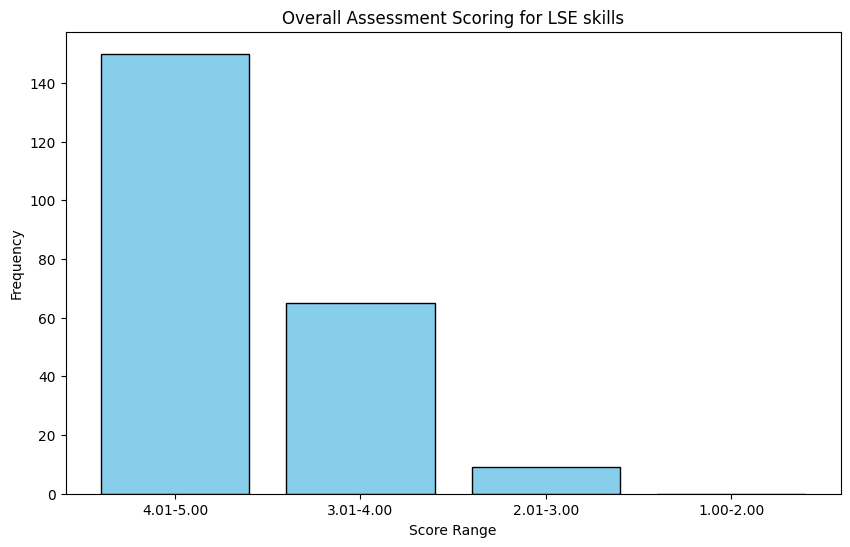

In [51]:
# Define the assessment ranges
bins = [1.00, 2.00, 3.00, 4.00, 5.00]  # Define bins as scoring range
labels = ['1.00-2.00', '2.01-3.00', '3.01-4.00', '4.01-5.00']  # Labels for each group

# Create a new column 'Overall Assessment Group' based on the 'Overall Assessment Scoring' column
LIID_12skills_data['Overall Assessment Group'] = pd.cut(LIID_12skills_data['Overall Assesment Scoring'], bins=bins, labels=labels, right=True)

# Count the frequency of each Assessment Group group
Overall_Assessment_Group_counts = LIID_12skills_data['Overall Assessment Group'].value_counts()

# Display the result
print(Overall_Assessment_Group_counts)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(Overall_Assessment_Group_counts.index.astype(str), Overall_Assessment_Group_counts.values, color='skyblue', edgecolor='black')
plt.title('Overall Assessment Scoring for LSE skills')
plt.xlabel('Score Range')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.savefig(r"C:\Users\HP\Documents\brooks interview\Overall Assessment Scoring for LSE skill.png")
plt.show()

In [52]:
LIID_12skills_data.head()

,Start Date,End Date,Respondents ID,Camp Name,Essence,Dealing with Adversities skill,Resilience,National Identity,National Purpose,Respect for Diversity,...,LSE intervention meets my approval,LSE intervention is appealing to me,I like the LSE intervention,I welcome the LSE intervention,LSE intervention seems fitting for IDP,LSE intervention seems suitable for communities,LSE intervention seems applicable to mental health needs,LSE intervention seems a good match for our situation,Overall Assesment Scoring,Overall Assessment Group
0,2024-11-15 10:26:44.834,2024-11-16 04:43:12.457,LIID_DUUR001,Duur IDP camp,5.00,4.00,3.67,4.67,4.67,4.67,...,5,5,5,5,4,4,4,4,4.45,4.01-5.00
1,2024-11-14 10:41:11.997,2024-11-14 10:56:53.154,LIID_DUUR002,Duur IDP camp,3.67,2.33,3.67,4.33,3.33,5.00,...,5,5,5,5,5,5,5,5,3.97,3.01-4.00
2,2024-11-14 10:42:23.147,2024-11-14 13:47:43.218,LIID_DUUR003,Duur IDP camp,5.00,3.67,4.33,4.67,4.67,5.00,...,5,5,5,5,5,5,5,5,4.61,4.01-5.00
3,2024-11-14 12:29:52.286,2024-11-15 06:30:01.436,LIID_DUUR004,Duur IDP camp,5.00,3.00,4.00,5.00,5.00,4.00,...,5,5,5,5,5,5,5,5,4.50,4.01-5.00
4,2024-11-14 12:03:09.936,2024-11-14 12:17:57.888,LIID_DUUR005,Duur IDP camp,3.33,3.33,4.00,3.00,4.00,4.33,...,4,5,4,4,4,4,4,4,3.61,3.01-4.00


In [53]:
# Separate the dataset into two tables based on the 'Camp Name' column
DuurCamp_InPerson_LIID_Report = LIID_12skills_data[LIID_12skills_data['Camp Name'] == 'Duur IDP camp']
SawaCamp_Telegram_LIID_Report = LIID_12skills_data[LIID_12skills_data['Camp Name'] == 'Sawa IDP Camp']

In [54]:
DuurCamp_InPerson_LIID_Report.head()

,Start Date,End Date,Respondents ID,Camp Name,Essence,Dealing with Adversities skill,Resilience,National Identity,National Purpose,Respect for Diversity,...,LSE intervention meets my approval,LSE intervention is appealing to me,I like the LSE intervention,I welcome the LSE intervention,LSE intervention seems fitting for IDP,LSE intervention seems suitable for communities,LSE intervention seems applicable to mental health needs,LSE intervention seems a good match for our situation,Overall Assesment Scoring,Overall Assessment Group
0,2024-11-15 10:26:44.834,2024-11-16 04:43:12.457,LIID_DUUR001,Duur IDP camp,5.00,4.00,3.67,4.67,4.67,4.67,...,5,5,5,5,4,4,4,4,4.45,4.01-5.00
1,2024-11-14 10:41:11.997,2024-11-14 10:56:53.154,LIID_DUUR002,Duur IDP camp,3.67,2.33,3.67,4.33,3.33,5.00,...,5,5,5,5,5,5,5,5,3.97,3.01-4.00
2,2024-11-14 10:42:23.147,2024-11-14 13:47:43.218,LIID_DUUR003,Duur IDP camp,5.00,3.67,4.33,4.67,4.67,5.00,...,5,5,5,5,5,5,5,5,4.61,4.01-5.00
3,2024-11-14 12:29:52.286,2024-11-15 06:30:01.436,LIID_DUUR004,Duur IDP camp,5.00,3.00,4.00,5.00,5.00,4.00,...,5,5,5,5,5,5,5,5,4.50,4.01-5.00
4,2024-11-14 12:03:09.936,2024-11-14 12:17:57.888,LIID_DUUR005,Duur IDP camp,3.33,3.33,4.00,3.00,4.00,4.33,...,4,5,4,4,4,4,4,4,3.61,3.01-4.00


In [55]:
DuurCamp_InPerson_LIID_Report.shape

(99, 26)

In [56]:
SawaCamp_Telegram_LIID_Report.head()

,Start Date,End Date,Respondents ID,Camp Name,Essence,Dealing with Adversities skill,Resilience,National Identity,National Purpose,Respect for Diversity,...,LSE intervention meets my approval,LSE intervention is appealing to me,I like the LSE intervention,I welcome the LSE intervention,LSE intervention seems fitting for IDP,LSE intervention seems suitable for communities,LSE intervention seems applicable to mental health needs,LSE intervention seems a good match for our situation,Overall Assesment Scoring,Overall Assessment Group
99,2024-11-14 12:38:36.847,2024-11-14 15:49:52.117,LIID_SAWA001,Sawa IDP Camp,4.00,4.33,4.33,4.00,4.67,4.33,...,5,5,5,5,5,4,5,4,4.28,4.01-5.00
100,2024-11-14 12:39:04.127,2024-11-14 12:53:28.343,LIID_SAWA002,Sawa IDP Camp,5.00,4.00,4.67,4.33,5.00,4.67,...,5,5,5,4,5,5,5,4,4.61,4.01-5.00
101,2024-11-14 10:55:40.381,2024-11-14 22:23:04.984,LIID_SAWA003,Sawa IDP Camp,5.00,5.00,3.00,5.00,5.00,4.67,...,4,5,5,5,4,4,4,4,4.42,4.01-5.00
102,2024-11-14 12:39:47.848,2024-11-14 22:24:18.039,LIID_SAWA004,Sawa IDP Camp,3.67,3.00,3.00,5.00,4.67,5.00,...,5,5,5,5,5,5,5,5,4.44,4.01-5.00
103,2024-11-14 13:48:30.767,2024-11-14 14:02:40.792,LIID_SAWA005,Sawa IDP Camp,3.67,2.67,3.67,3.67,4.00,4.00,...,4,4,5,4,4,4,5,4,3.44,3.01-4.00


In [57]:
SawaCamp_Telegram_LIID_Report.shape

(125, 26)

# Closely checking the minimum score range between each columns for both camp

In [58]:
# Drop columns that you dont need their mean values. I only need the 12 LSE skills for duur
columns_to_drop = ['Start Date', 'End Date', 'Respondents ID', 'Camp Name', 'LSE intervention meets my approval', 'LSE intervention is appealing to me', 'I like the LSE intervention', 'I welcome the LSE intervention', 'LSE intervention seems fitting for IDP', 'LSE intervention seems suitable for communities', 'LSE intervention seems applicable to mental health needs', 'LSE intervention seems a good match for our situation', 'Overall Assesment Scoring', 'Overall Assessment Group']

# Drop the columns
DuurCamp_InPerson_LIID_Report_dropped = DuurCamp_InPerson_LIID_Report.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(DuurCamp_InPerson_LIID_Report_dropped)


    Essence  Dealing with Adversities skill  Resilience  National Identity  \
0      5.00                            4.00        3.67               4.67   
1      3.67                            2.33        3.67               4.33   
2      5.00                            3.67        4.33               4.67   
3      5.00                            3.00        4.00               5.00   
4      3.33                            3.33        4.00               3.00   
..      ...                             ...         ...                ...   
94     5.00                            3.33        3.67               4.33   
95     3.67                            4.33        4.00               2.67   
96     3.67                            2.67        3.00               3.67   
97     4.00                            3.00        3.33               4.33   
98     3.00                            3.33        3.67               4.33   

    National Purpose  Respect for Diversity  Creativity  Critic

           Essence  Dealing with Adversities skill  Resilience  \
1.00-2.00        0                               0           2   
2.01-3.00        2                              12           5   
3.01-4.00       21                              32          38   
4.01-5.00       76                              55          54   

           National Identity  National Purpose  Respect for Diversity  \
1.00-2.00                  2                 6                      0   
2.01-3.00                 15                10                      7   
3.01-4.00                 19                29                     21   
4.01-5.00                 63                54                     71   

           Creativity  Critical Thinking  Problem Solving  Cooperation  \
1.00-2.00           1                  1                1            0   
2.01-3.00           4                  5                5            1   
3.01-4.00          26                 26               36           28   
4.01-5.

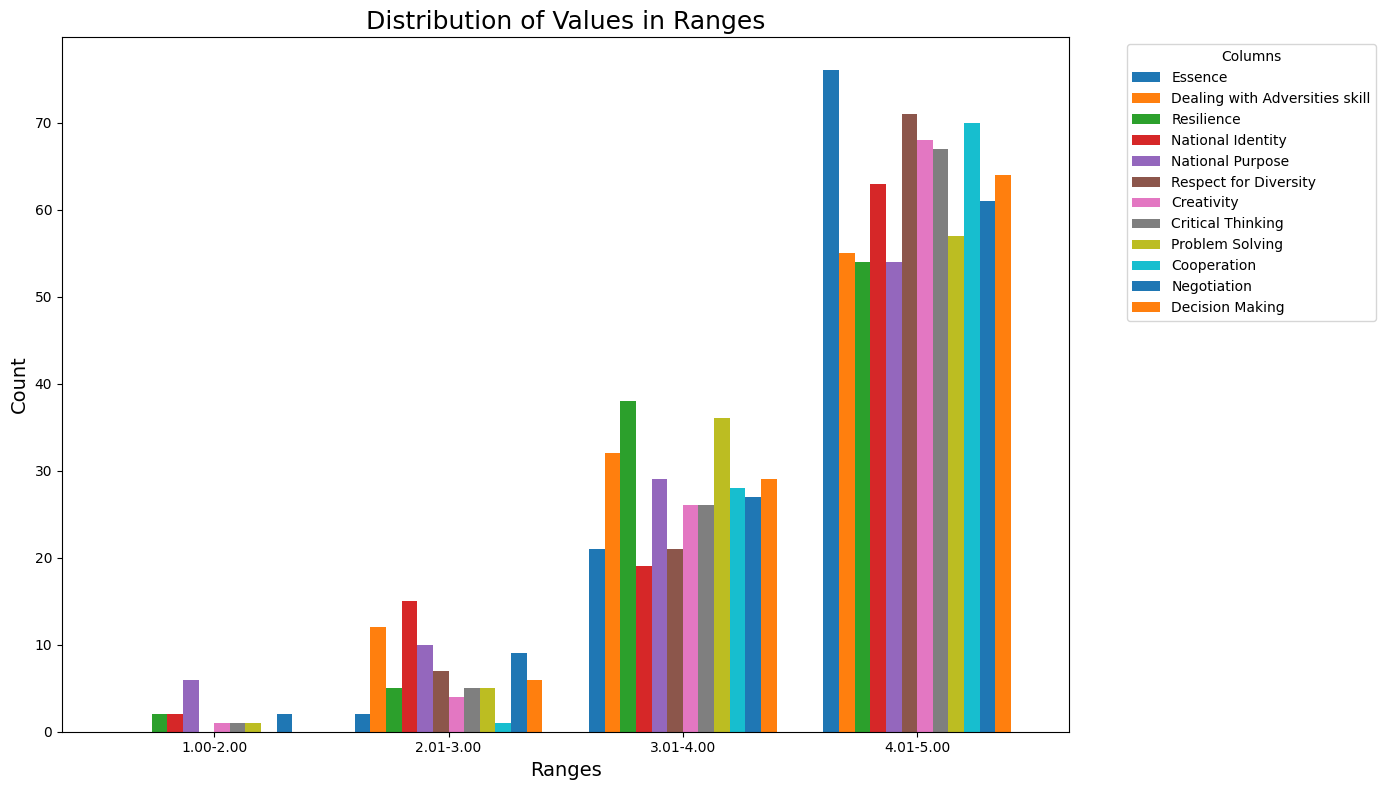

In [59]:
# Define bins and labels for the ranges
bins = [1.00, 2.00, 3.00, 4.00, 5.00]  # Define bins as scoring range
labels = ['1.00-2.00', '2.01-3.00', '3.01-4.00', '4.01-5.00']  # Labels for each group

# Function to bin and count for all numeric columns
def bin_and_count(DuurCamp_InPerson_LIID_Report_dropped, bins, labels):
    numeric_cols = DuurCamp_InPerson_LIID_Report_dropped.select_dtypes(include=[np.number]).columns
    binned_counts = {}

    for col in numeric_cols:
        binned_data = pd.cut(DuurCamp_InPerson_LIID_Report_dropped[col], bins=bins, labels=labels, include_lowest=True)
        binned_counts[col] = binned_data.value_counts().sort_index()

    return pd.DataFrame(binned_counts)

# Get the binned counts
binned_counts = bin_and_count(DuurCamp_InPerson_LIID_Report_dropped, bins, labels)

# Displaying the results
print(binned_counts)

# Plotting the results
binned_counts.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Distribution of Values in Ranges', fontsize=18)
plt.xlabel('Ranges', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(r"C:\Users\HP\Documents\brooks interview\individual domain score range in Duur.png")
plt.show()


In [60]:
# Drop columns that you dont need their mean values. I only need the 12 LSE skills for sawa camp 
columns_to_drop = ['Start Date', 'End Date', 'Respondents ID', 'Camp Name', 'LSE intervention meets my approval', 'LSE intervention is appealing to me', 'I like the LSE intervention', 'I welcome the LSE intervention', 'LSE intervention seems fitting for IDP', 'LSE intervention seems suitable for communities', 'LSE intervention seems applicable to mental health needs', 'LSE intervention seems a good match for our situation', 'Overall Assesment Scoring', 'Overall Assessment Group']

# Drop the columns
SawaCamp_Telegram_LIID_Report_dropped = SawaCamp_Telegram_LIID_Report.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(SawaCamp_Telegram_LIID_Report_dropped)

     Essence  Dealing with Adversities skill  Resilience  National Identity  \
99      4.00                            4.33        4.33               4.00   
100     5.00                            4.00        4.67               4.33   
101     5.00                            5.00        3.00               5.00   
102     3.67                            3.00        3.00               5.00   
103     3.67                            2.67        3.67               3.67   
..       ...                             ...         ...                ...   
219     5.00                            4.00        3.00               4.33   
220     5.00                            5.00        4.67               4.67   
221     4.67                            5.00        4.00               4.33   
222     5.00                            4.67        4.00               5.00   
223     5.00                            4.33        5.00               4.67   

     National Purpose  Respect for Diversity  Creat

           Essence  Dealing with Adversities skill  Resilience  \
1.00-2.00        3                               6           5   
2.01-3.00       17                              21          22   
3.01-4.00       35                              31          34   
4.01-5.00       70                              67          64   

           National Identity  National Purpose  Respect for Diversity  \
1.00-2.00                  5                 3                      1   
2.01-3.00                 16                11                      7   
3.01-4.00                 24                33                     40   
4.01-5.00                 80                78                     77   

           Creativity  Critical Thinking  Problem Solving  Cooperation  \
1.00-2.00           6                  1                7            1   
2.01-3.00          18                 11               13            9   
3.01-4.00          33                 33               43           40   
4.01-5.

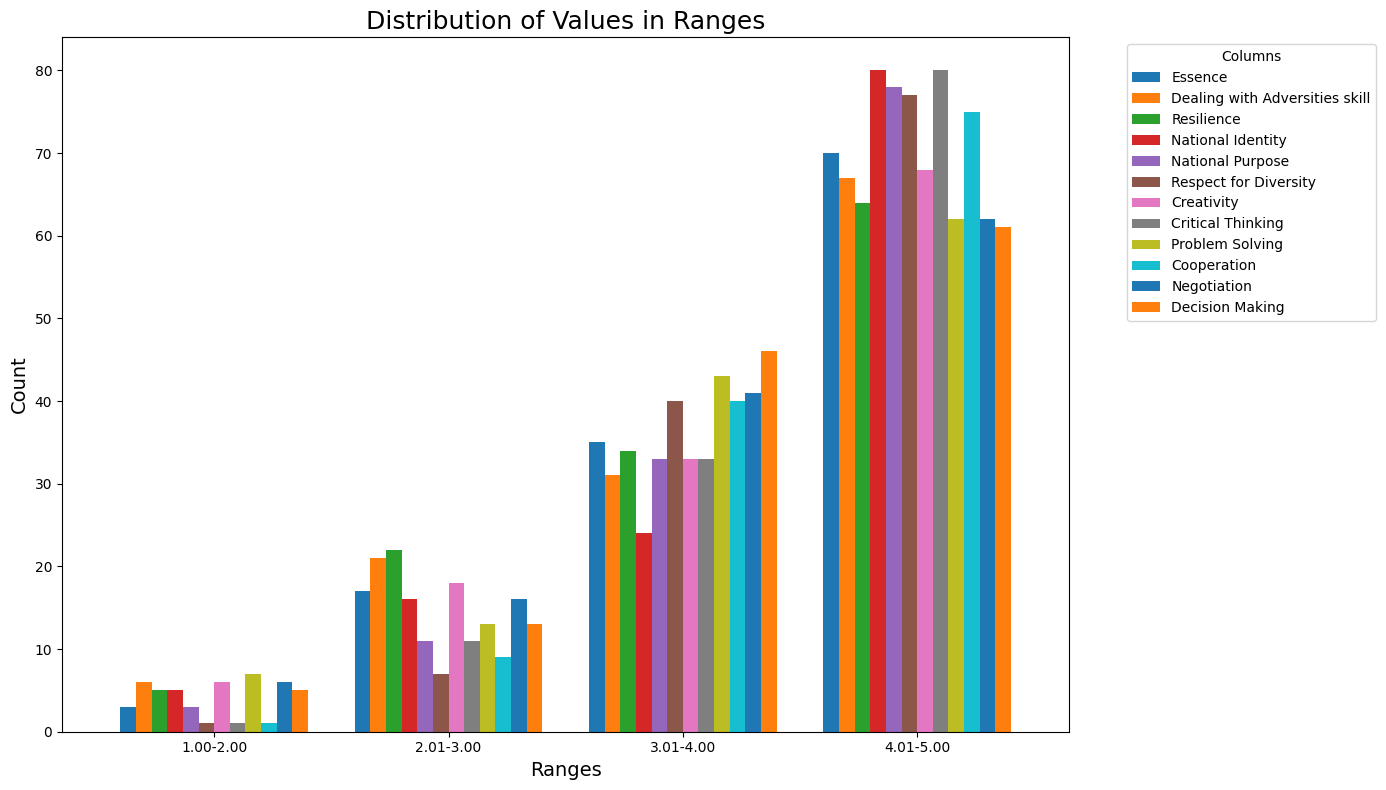

In [61]:
# Define bins and labels for the ranges
bins = [1.00, 2.00, 3.00, 4.00, 5.00]  # Define bins as scoring range
labels = ['1.00-2.00', '2.01-3.00', '3.01-4.00', '4.01-5.00']  # Labels for each group

# Function to bin and count for all numeric columns
def bin_and_count(SawaCamp_Telegram_LIID_Report_dropped, bins, labels):
    numeric_cols = SawaCamp_Telegram_LIID_Report_dropped.select_dtypes(include=[np.number]).columns
    binned_counts = {}

    for col in numeric_cols:
        binned_data = pd.cut(SawaCamp_Telegram_LIID_Report_dropped[col], bins=bins, labels=labels, include_lowest=True)
        binned_counts[col] = binned_data.value_counts().sort_index()

    return pd.DataFrame(binned_counts)

# Get the binned counts
binned_counts = bin_and_count(SawaCamp_Telegram_LIID_Report_dropped, bins, labels)

# Displaying the results
print(binned_counts)

# Plotting the results
binned_counts.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Distribution of Values in Ranges', fontsize=18)
plt.xlabel('Ranges', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(r"C:\Users\HP\Documents\brooks interview\individual domain score range in sawa.png")
plt.show()

# Overall Assesment Scoring per camp

4.01-5.00    72
3.01-4.00    26
2.01-3.00     1
1.00-2.00     0
Name: Overall Assessment Group, dtype: int64


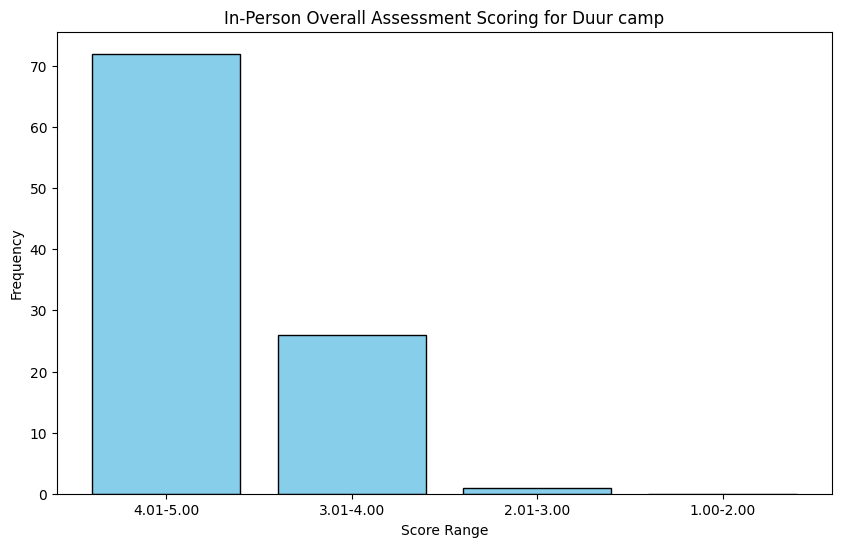

In [62]:
# Define the assessment ranges
bins = [1.00, 2.00, 3.00, 4.00, 5.00]  # Define bins as scoring range
labels = ['1.00-2.00', '2.01-3.00', '3.01-4.00', '4.01-5.00']  # Labels for each group

# Create a new column 'Overall Assessment Group' based on the 'Overall Assessment Scoring' column
DuurCamp_InPerson_LIID_Report['Overall Assessment Group'] = pd.cut(DuurCamp_InPerson_LIID_Report['Overall Assesment Scoring'], bins=bins, labels=labels, right=True)

# Count the frequency of each Assessment Group group
Overall_Assessment_Group_counts = DuurCamp_InPerson_LIID_Report['Overall Assessment Group'].value_counts()

# Display the result
print(Overall_Assessment_Group_counts)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(Overall_Assessment_Group_counts.index.astype(str), Overall_Assessment_Group_counts.values, color='skyblue', edgecolor='black')
plt.title('In-Person Overall Assessment Scoring for Duur camp')
plt.xlabel('Score Range')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.savefig(r"C:\Users\HP\Documents\brooks interview\Overall Assessment Scoring for LSE skill in Duur Camp.png")
plt.show()

4.01-5.00    78
3.01-4.00    39
2.01-3.00     8
1.00-2.00     0
Name: Overall Assessment Group, dtype: int64


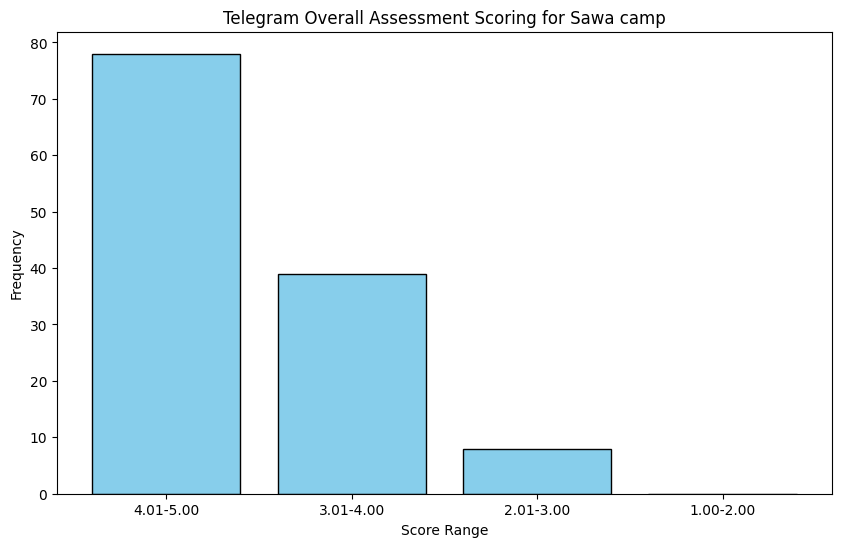

In [63]:
# Define the assessment ranges
bins = [1.00, 2.00, 3.00, 4.00, 5.00]  # Define bins as scoring range
labels = ['1.00-2.00', '2.01-3.00', '3.01-4.00', '4.01-5.00']  # Labels for each group

# Create a new column 'Overall Assessment Group' based on the 'Overall Assessment Scoring' column
SawaCamp_Telegram_LIID_Report['Overall Assessment Group'] = pd.cut(SawaCamp_Telegram_LIID_Report['Overall Assesment Scoring'], bins=bins, labels=labels, right=True)

# Count the frequency of each Assessment Group group
Overall_Assessment_Group_counts = SawaCamp_Telegram_LIID_Report['Overall Assessment Group'].value_counts()

# Display the result
print(Overall_Assessment_Group_counts)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(Overall_Assessment_Group_counts.index.astype(str), Overall_Assessment_Group_counts.values, color='skyblue', edgecolor='black')
plt.title('Telegram Overall Assessment Scoring for Sawa camp')
plt.xlabel('Score Range')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.savefig(r"C:\Users\HP\Documents\brooks interview\Overall Assessment Scoring for LSE skill in Sawa Camp.png")
plt.show()

# Acceptability Test for both camps

In [64]:
# Take the median of each column representing acceptability to know peoples view since the response is abnormally distributed

median_Acceptabity_Duur = DuurCamp_InPerson_LIID_Report.iloc[:, 16:20].median()

print(median_Acceptabity_Duur)

LSE intervention meets my approval     5.0
LSE intervention is appealing to me    5.0
I like the LSE intervention            5.0
I welcome the LSE intervention         5.0
dtype: float64


In [65]:
# Take the median of each column representing acceptability to know peoples view since the response is abnormally distributed

median_Acceptabity_Sawa = SawaCamp_Telegram_LIID_Report.iloc[:, 16:20].median()

print(median_Acceptabity_Sawa)

LSE intervention meets my approval     5.0
LSE intervention is appealing to me    5.0
I like the LSE intervention            5.0
I welcome the LSE intervention         5.0
dtype: float64


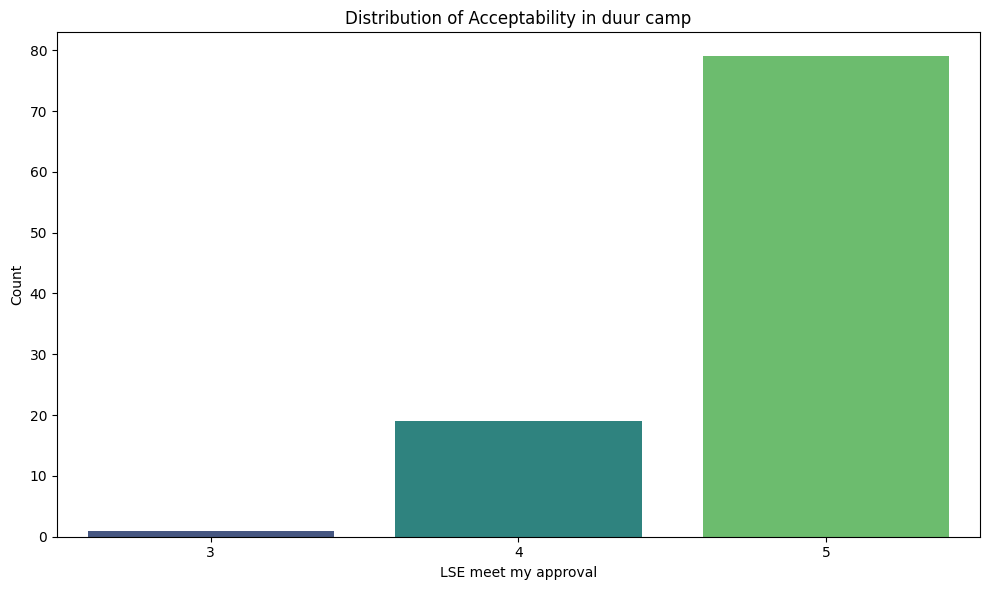

In [66]:
# Creating a count plot to visualize the acceptability distribution
plt.figure(figsize=(10, 6))

# Count plot for LSE meet my approval
sns.countplot(x='LSE intervention meets my approval', data=DuurCamp_InPerson_LIID_Report, palette='viridis')
plt.title('Distribution of Acceptability in duur camp')
plt.xlabel('LSE meet my approval')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(r"C:\Users\HP\Documents\brooks interview\Acceptability of LSE intervention in Duur camp.png")
plt.show()

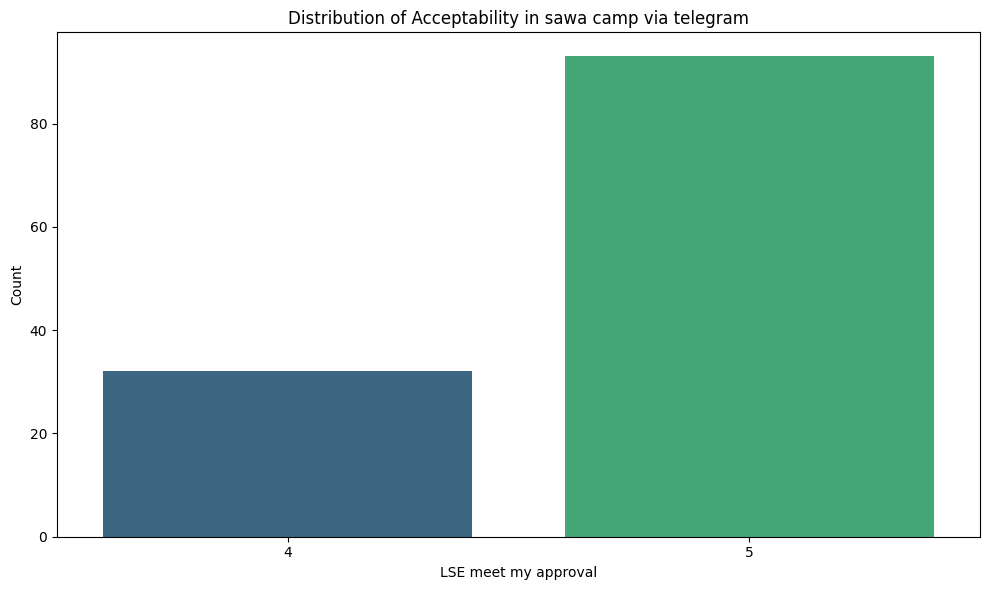

In [67]:
# Creating a count plot to visualize the acceptability distribution
plt.figure(figsize=(10, 6))

# Count plot for LSE meet my approval
sns.countplot(x='LSE intervention meets my approval', data=SawaCamp_Telegram_LIID_Report, palette='viridis')
plt.title('Distribution of Acceptability in sawa camp via telegram')
plt.xlabel('LSE meet my approval')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(r"C:\Users\HP\Documents\brooks interview\Acceptability of LSE intervention in Sawa camp.png")
plt.show()

# Appropriateness Test

In [68]:
# Take the median of each column representing appropriateness to know peoples view since the response is abnormally distributed

median_Appropriateness_Duur = DuurCamp_InPerson_LIID_Report.iloc[:, 20:24].median()

print(median_Appropriateness_Duur)

LSE intervention seems fitting for IDP                      5.0
LSE intervention seems suitable for communities             5.0
LSE intervention seems applicable to mental health needs    5.0
LSE intervention seems a good match for our situation       5.0
dtype: float64


In [69]:
# Take the median of each column representing appropriateness to know peoples view since the response is abnormally distributed

median_Appropriateness_Sawa = SawaCamp_Telegram_LIID_Report.iloc[:, 20:24].median()

print(median_Appropriateness_Sawa)

LSE intervention seems fitting for IDP                      5.0
LSE intervention seems suitable for communities             5.0
LSE intervention seems applicable to mental health needs    5.0
LSE intervention seems a good match for our situation       5.0
dtype: float64


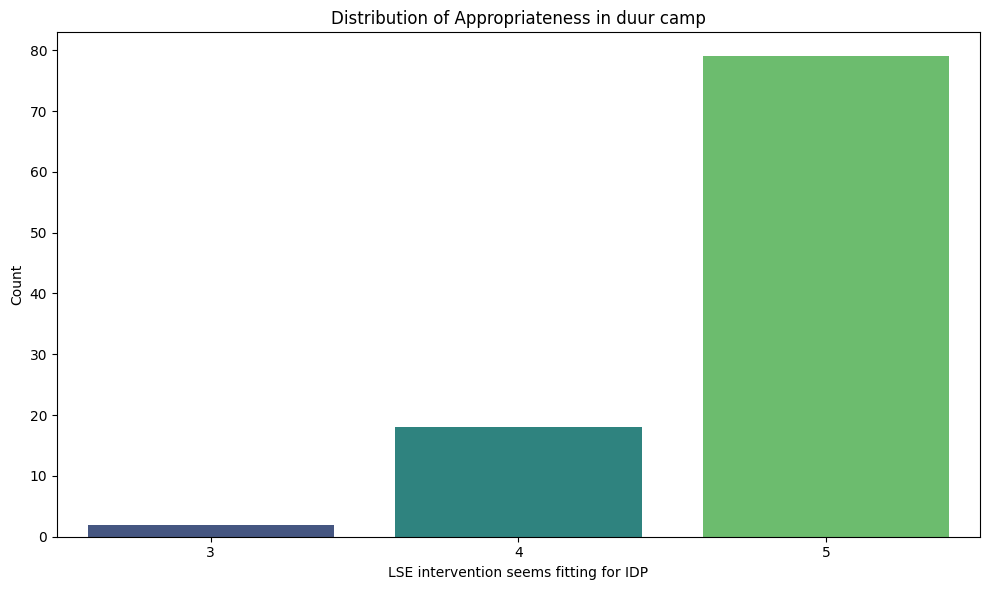

In [70]:
# Creating a count plot to visualize the appropriateness distribution
plt.figure(figsize=(10, 6))

# Count plot for LSE meet my approval
sns.countplot(x='LSE intervention seems fitting for IDP', data=DuurCamp_InPerson_LIID_Report, palette='viridis')
plt.title('Distribution of Appropriateness in duur camp')
plt.xlabel('LSE intervention seems fitting for IDP')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(r"C:\Users\HP\Documents\brooks interview\Appropriateness of LSE intervention in Duur camp.png")
plt.show()

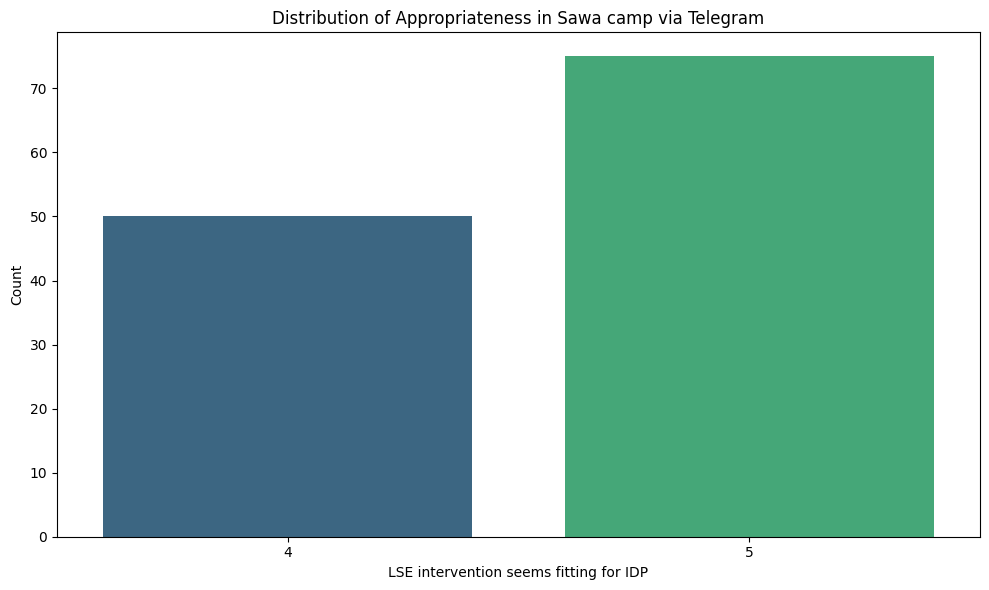

In [71]:
# Creating a count plot to visualize the appropriateness distribution
plt.figure(figsize=(10, 6))

# Count plot for LSE meet my approval
sns.countplot(x='LSE intervention seems fitting for IDP', data=SawaCamp_Telegram_LIID_Report, palette='viridis')
plt.title('Distribution of Appropriateness in Sawa camp via Telegram')
plt.xlabel('LSE intervention seems fitting for IDP')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(r"C:\Users\HP\Documents\brooks interview\Appropriateness of LSE intervention in Sawa camp.png")
plt.show()

# Compare domain scoring in both camps

In [72]:
descriptive_stat_DuurCamp = DuurCamp_InPerson_LIID_Report.describe()
descriptive_stat_DuurCamp

,Essence,Dealing with Adversities skill,Resilience,National Identity,National Purpose,Respect for Diversity,Creativity,Critical Thinking,Problem Solving,Cooperation,...,Decision Making,LSE intervention meets my approval,LSE intervention is appealing to me,I like the LSE intervention,I welcome the LSE intervention,LSE intervention seems fitting for IDP,LSE intervention seems suitable for communities,LSE intervention seems applicable to mental health needs,LSE intervention seems a good match for our situation,Overall Assesment Scoring
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,4.589394,4.249293,4.262626,4.249091,4.181818,4.515152,4.410505,4.461717,4.333636,4.548586,...,4.441111,4.787879,4.858586,4.787879,4.808081,4.777778,4.787879,4.797980,4.787879,4.381616
std,0.583293,0.783280,0.719339,0.892575,0.992436,0.682423,0.722192,0.713490,0.745389,0.576465,...,0.689830,0.435016,0.378237,0.435016,0.395814,0.464133,0.410891,0.403551,0.435016,0.571578
min,2.330000,2.330000,1.670000,1.670000,1.000000,2.330000,1.330000,1.670000,2.000000,3.000000,...,2.670000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000
25%,4.330000,3.670000,4.000000,3.670000,3.835000,4.000000,4.000000,4.000000,3.670000,4.000000,...,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.985000
50%,5.000000,4.330000,4.330000,4.670000,4.330000,5.000000,4.670000,4.670000,4.670000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.560000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.920000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [73]:
descriptive_stat_DuurCamp.to_csv(r"C:\Users\HP\Documents\brooks interview\descriptive stats Duur Camp.csv")

In [74]:
descriptive_stat_SawaCamp = SawaCamp_Telegram_LIID_Report.describe()
descriptive_stat_SawaCamp

,Essence,Dealing with Adversities skill,Resilience,National Identity,National Purpose,Respect for Diversity,Creativity,Critical Thinking,Problem Solving,Cooperation,...,Decision Making,LSE intervention meets my approval,LSE intervention is appealing to me,I like the LSE intervention,I welcome the LSE intervention,LSE intervention seems fitting for IDP,LSE intervention seems suitable for communities,LSE intervention seems applicable to mental health needs,LSE intervention seems a good match for our situation,Overall Assesment Scoring
count,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,...,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,4.157200,4.034640,4.018720,4.16032,4.280480,4.285600,4.064400,4.307120,4.023920,4.282960,...,4.064400,4.744000,4.592000,4.576000,4.680000,4.600000,4.576000,4.712000,4.720000,4.140880
std,0.836962,0.989214,0.920073,0.85905,0.781658,0.645888,0.931363,0.754398,0.938313,0.713548,...,0.847768,0.438178,0.493441,0.496179,0.468353,0.491869,0.512174,0.454653,0.450806,0.619301
min,1.330000,1.000000,1.330000,1.67000,2.000000,2.000000,1.000000,2.000000,1.000000,1.670000,...,1.330000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,2.750000
25%,3.670000,3.330000,3.330000,3.67000,4.000000,4.000000,3.330000,3.670000,3.330000,4.000000,...,3.670000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.580000
50%,4.330000,4.330000,4.330000,4.33000,4.670000,4.330000,4.330000,4.670000,4.000000,4.330000,...,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.360000
75%,5.000000,5.000000,5.000000,4.67000,5.000000,4.670000,5.000000,5.000000,5.000000,5.000000,...,4.670000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.640000
max,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [75]:
descriptive_stat_SawaCamp.to_csv(r"C:\Users\HP\Documents\brooks interview\descriptive stats Sawa Camp.csv")

In [76]:
# Performing t-test
# Separate numerical data by category
DuurCamp_InPerson_LIID_Report_test = DuurCamp_InPerson_LIID_Report[DuurCamp_InPerson_LIID_Report['Camp Name'] == 'Duur IDP camp']['Overall Assesment Scoring']
SawaCamp_Telegram_LIID_Report_test = SawaCamp_Telegram_LIID_Report[SawaCamp_Telegram_LIID_Report['Camp Name'] == 'Sawa IDP Camp']['Overall Assesment Scoring']

t_stat, p_value = ttest_ind(DuurCamp_InPerson_LIID_Report_test, SawaCamp_Telegram_LIID_Report_test)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: 2.9886719052830926
P-Value: 0.0031172990032136525
